# Практическая аналитика: <b>Aналитическая воронка</b>
<br>
<br>

![Многоэтапная конверсия посетителя в покупателя](img/funnel.png)

У нас есть сайте, на который приходят *посетители* с просторов интернета, - приходят сначала на *главную страницу* на `home_page`. Потом они начинают искать нужный товар и переходят на *страницу поиска* `searsh_page`, ищут товары, выбирают и добавляют их в *корзину*. Далее, если им действительно понравилось то, что они выбрали, они начинают процесс оплаты *корзины*: переходят на *страницу оплаты* `payment_page`, вводят данные оплаты и в итоге завершают оплату на *странице завершения оплаты* `payment_confirmation`.

Для посетителей сайта это ещё не конец, нужно ещё дождаться доставки товаров, а для владельца сайта именно ***завершение оплаты*** - это так называемое <u>**целевое действие**</u>, ради которого и делается сайт. <u>***Цель владельца сайта***</u> - всеми способами <u>*максимизировать целевое действие*</u> или <u>*сумму денег, оплаченных в ходе целевого действия*</u>. А <u>***цель аналитика***</u>: - понять, что <u>*максимально способствует или мешает успешному совершению целевого действия для посетителей сайта*</u>.

Существует много способов нагнать посетителей на сайт (за счёт рекламы, маркетинга и т.д.). Но аналитик может <u>*помочь увеличить вероятность*</u> того, что посетитель, который зашёл на сайт, в последствии <u>*совершит покупку*</u>, т.е. <u>*совершит целевое действие*</u>.<br>
Однако, владельцу сайта важно не количество посетителей, а <u>*целевые действия*</u>, важна <u>**вероятность**</u> того, что посетитель совершит покупку. И **аналитика** может помочь в этом деле.

Тема данного *аналитического отчёта* **"Воронки"**, посвящена методам изучения процесса конверсии *посетителей* сайта в *покупателей*.

<u>**Конверсия**</u> - это соотношение ***количества покупателей*** к ***количеству посетителей***, измеряемая в *процентах* (%).

Если на главную страницу пришло **1000** человек, **500** осуществили поиск, **200** человек начали процесс покупки и **100** человек заплатили, то конверсия из посетителей в пкупателей для такого сайта:

![Многоэтапная конверсия посетителя в покупателя](img/conversion.png)

составит:
$$\textbf{Конверсия} = \frac{100\space(заплатившие)}{1000\space(пришедшие)} \times 100\% = \textbf{10%}$$
___

## Визуализация воронки

Визуализируем воображаемую воронку с вышеуказанными цифрами *конверсии* для каждого шага воронки

In [1]:
import pandas as pd, numpy as np
funnel_init = {'1_home_page': 1000,
               '2_search_page': 500,
               '3_payment_page': 200,
               '4_payment_confirmation_page': 100}
df_funnel = pd.DataFrame(funnel_init.items(), columns=['page', 'users'])
df_funnel

,page,users
0,1_home_page,1000
1,2_search_page,500
2,3_payment_page,200
3,4_payment_confirmation_page,100


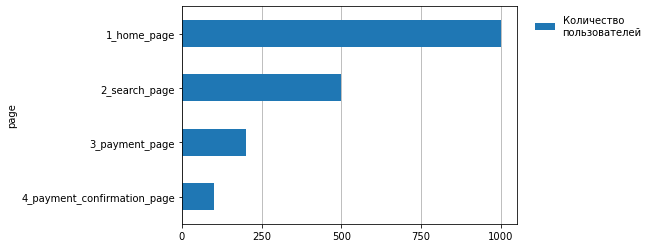

In [2]:
df_funnel.sort_values('page', ascending=False, inplace=True)
bar = df_funnel.plot.barh('page', 'users', xticks=np.arange(0,1001,250))
bar.legend(loc=1, labels=['Количество\nпользователей'], bbox_to_anchor=(1, 0.8, 0.4, 0.2), frameon=False)
bar.grid(axis='x')
bar.set_axisbelow(True)

Теперь представим воронку в другом виде

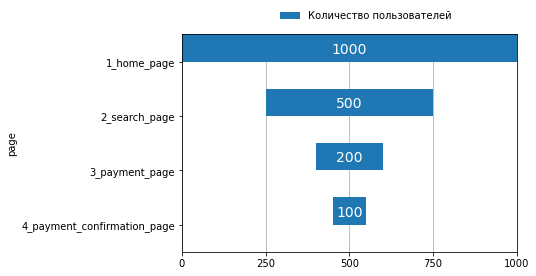

In [3]:
df_funnel.sort_values('page', ascending=False, inplace=True)
bar = df_funnel.plot.barh('page', 'users', orientation='vertical', xticks=np.arange(-500,501,250), xlim=(-500,500))
bar.set_xticklabels(np.arange(0,1001,250))
for y, val in enumerate(df_funnel.users.values):
    bar.text(0, y+.1, val, ha='center', va='bottom', color='w', fontsize=14)
bar.legend(loc=9, labels=['Количество пользователей'], bbox_to_anchor=(0.3, 1, 0.5, 0.15), frameon=False)
bar.grid(axis='x')
bar.set_axisbelow(True)

Сверху воронки заходят *пользователи*, а снизу из неё выходят *покупатели* (*деньги*, которые они потратили), т.е. **воронка** - это конвертация *пользователей* сайта в *деньги*.\
*Воронка* строится на основе данных об ативности пользователей на сайте. На основании т.н. ***кликстрима*** или ***потока кликов***.
___

Загрузим данные ***кликстрима*** пользователей сайта из файла [`click_stream.csv`](data/click_stream.csv "click stream") и рассчитаем, сколько клиентов на какой стадии воронки находится

In [4]:
import csv

with open('data/click_stream.csv', mode='r') as csv_file: # открываем файл
    csv_reader = csv.DictReader(csv_file) # читаем файл
    funnel = {} # создаём словарь в который будем собирать значения
    
    for row in csv_reader: #перебираем по одной строчке нашего файла
        page = list(row.values())[1] #так можно получить первый (не нулевой) элемент строки -
        # для нашего датасета это строка, указывающая, на какой страничке было совершено действие
        
        # проверяем существует ли ключ с названием страницы в словаре
        if page not in funnel:
            funnel[page] = 1 # если нет, создаём ключ и присваиваем значение "единица"
        else:
            funnel[page] += 1 # если существует, увеличиваем значение по ключу на единицу

funnel

{'1_home_page': 90399,
 '2_search_page': 45200,
 '3_payment_page': 6030,
 '4_payment_confirmation_page': 452}

In [5]:
df = pd.DataFrame(funnel.items(), columns=['page', 'users'])
df

,page,users
0,1_home_page,90399
1,2_search_page,45200
2,3_payment_page,6030
3,4_payment_confirmation_page,452


**Воронка** конвертации посетителей *главной страницы сайта* в *покупателей* в <u>абсолютных величинах</u>

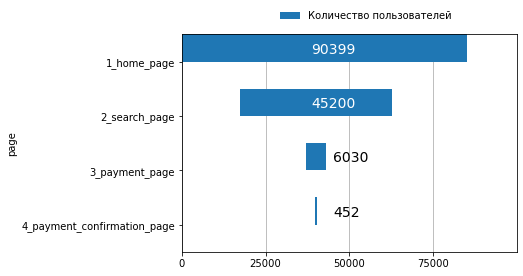

In [6]:
df.sort_values('page', ascending=False, inplace=True)
bar = df.plot.barh(x='page', left=40000, xticks=np.arange(0,1e5,2.5e4), xlim=(0,1e5), y='users', rot=0, orientation='vertical')
bar.legend(loc=9, labels=['Количество пользователей'], bbox_to_anchor=(0.3, 1, 0.5, 0.15), frameon=False)
bar.grid(axis='x')
bar.set_axisbelow(True)
for y, val in enumerate(df.users.values):
    bar.text(df.users.max()/2, y+.1, val, ha='center' if y>1 else 'left', va='bottom', color='w' if y>1 else 'black', fontsize=14)

## Сравнение воронок

А теперь сравним первую воронку с полученной только что воронкой.\
Чтобы сравнивать воронки рекомендуется смотреть их не в абсолютных числах, а в процентах от первого шага (в данном случае, от количества посетителей *главной страницы* сайта `home_page`).

In [7]:
funnel_init_cent = {}
for key, value in funnel_init.items():
    funnel_init_cent[key] = round(value / funnel_init['1_home_page'] * 100, 2)
funnel_init_cent

{'1_home_page': 100.0,
 '2_search_page': 50.0,
 '3_payment_page': 20.0,
 '4_payment_confirmation_page': 10.0}

In [8]:
df_funnel_c = pd.DataFrame(funnel_init_cent.items(), columns=['page', 'users'])
df_funnel_c.style.format({'users':'{:.2f}%'})

,page,users
0,1_home_page,100.00%
1,2_search_page,50.00%
2,3_payment_page,20.00%
3,4_payment_confirmation_page,10.00%


In [9]:
funnel_cent = {}
for key, value in funnel.items():
    funnel_cent[key] = round(value / funnel['1_home_page'] * 100, 2)
funnel_cent

{'1_home_page': 100.0,
 '2_search_page': 50.0,
 '3_payment_page': 6.67,
 '4_payment_confirmation_page': 0.5}

In [10]:
df_c = pd.DataFrame(funnel_cent.items(), columns=['page', 'users'])
df_c.style.format({'users':'{:.2f}%'})

,page,users
0,1_home_page,100.00%
1,2_search_page,50.00%
2,3_payment_page,6.67%
3,4_payment_confirmation_page,0.50%


А теперь построим графики обеих вороно, выраженных в *процентах* от *главной страницы*

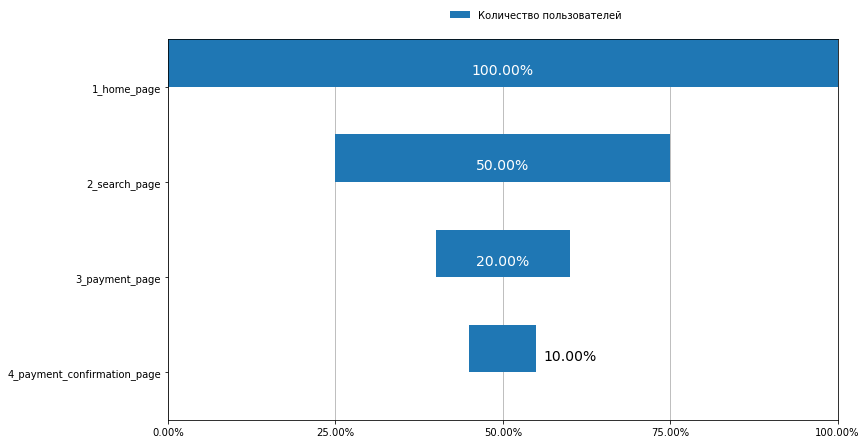

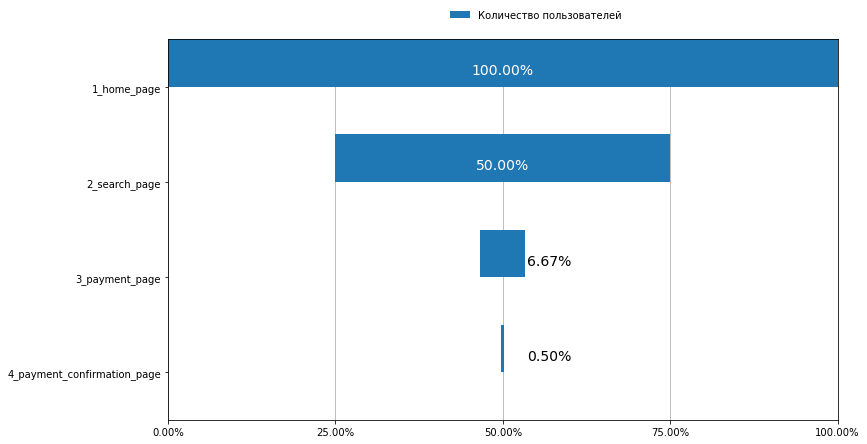

In [11]:
df_funnel_c.sort_values('page', ascending=False, inplace=True)
df_c.sort_values('page', ascending=False, inplace=True)

xticks, xlim = np.arange(-50,51,25), (-50,50)
xticklabels = [f'{x:.2f}%' for x in np.arange(0,101,25)]
bar1 = df_funnel_c.plot.barh(x='page', xlim=xlim, xticks=xticks, y='users', rot=0, orientation='vertical', figsize=(12,7))
bar1.set_xticklabels(xticklabels)
bar1.legend(loc=9, labels=['Количество пользователей'], bbox_to_anchor=(0.3, 0.95, 0.5, 0.15), frameon=False)
bar1.grid(axis='x')
bar1.set_axisbelow(True)
bar1.set_ylabel(None)
for y, val in enumerate(df_funnel_c.users.values):
    bar1.text(0 if y>0 else 10, y+.1, f'{val:.2f}%', ha='center', va='bottom', color='w' if y>0 else 'black', fontsize=14)

bar2 = df_c.plot.barh(x='page', xlim=xlim, xticks=xticks, y='users', rot=0, orientation='vertical', figsize=(12,7))
bar2.set_xticklabels(xticklabels)
bar2.legend(loc=9, labels=['Количество пользователей'], bbox_to_anchor=(0.3, 0.95, 0.5, 0.15), frameon=False)
bar2.grid(axis='x')
bar2.set_ylabel(None)
bar2.set_axisbelow(True)
for y, val in enumerate(df_c.users.values):
    bar2.text(0 if y>1 else 7, y+.1, f'{val:.2f}%', ha='center', va='bottom', color='w' if y>1 else 'black', fontsize=14)

Здесь видно, что конверсия 10% в первой воронке - это ещё не так плохо по сравнению со второй воронкой, где конверсия составляет всего лишь 0.5% процента.\
Сравнивая эти две воронки, мы видим что конверсия в *страницу поиска* у них практически одинаковая. Но потом начинаются значительные ухудшения.\
0.5% конверсия в *покупателей* - это на самом деле ещё не такая плохая конверсия для некоторых отраслей.

Теперь, попробуем проанализировать, что же можно улучшить, где локализована проблема: в поиске, в платеже или где-то ещё. Для этого попробуем оценить динамику воронки со временем. В файле ***кликстрима*** [`click_stream.csv`](data/click_stream.csv "click stream") есть столбец с *датой*. Там содержатся данные за четыре месяца (январь, февраль, март и апрель 2015 года). Построим воронки по каждому из четырёх месяцев и сравним их, оценим, одинаковые ли они, или же меняются со временем.

___
Продолжение в [следующем ноутбуке](funnels_2.ipynb "funnels 2")